<a href="https://colab.research.google.com/github/aframuneer26/Deep_Learning_Experiments/blob/main/DL_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 Testing MLP with hidden_layers=[8], activation=relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Test Accuracy: 0.9667, Test Loss: 0.2150


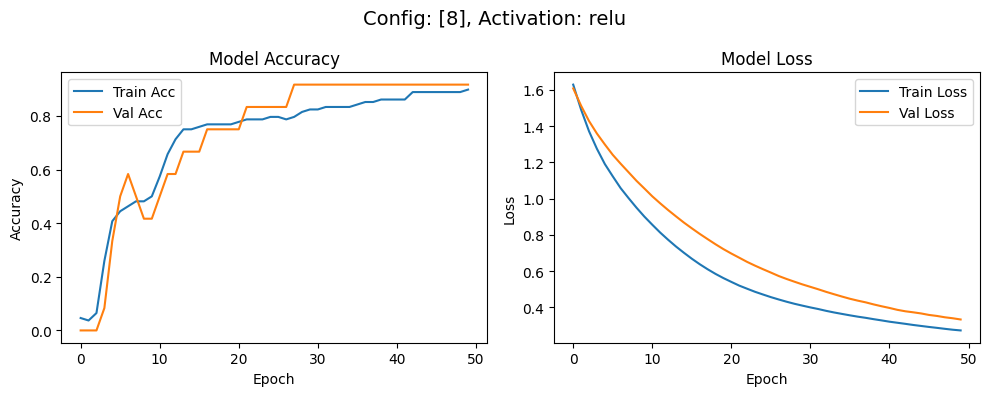


🔹 Testing MLP with hidden_layers=[8], activation=tanh
✅ Test Accuracy: 0.9667, Test Loss: 0.2001


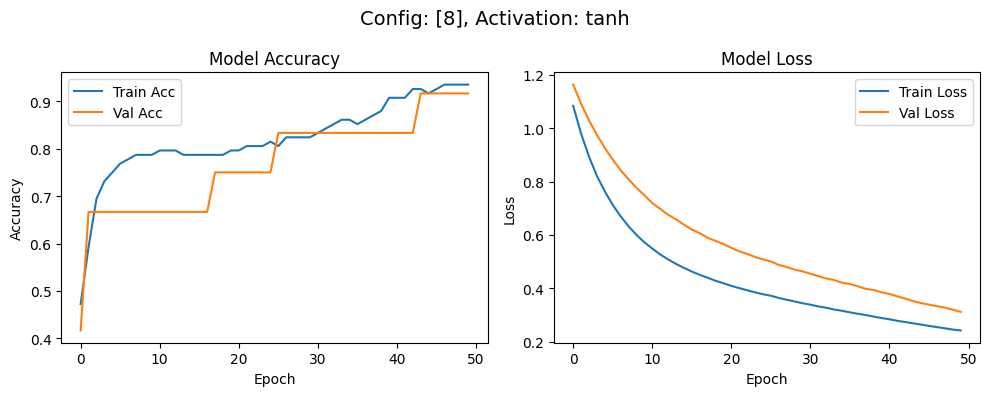


🔹 Testing MLP with hidden_layers=[8], activation=sigmoid
✅ Test Accuracy: 0.9333, Test Loss: 0.4643


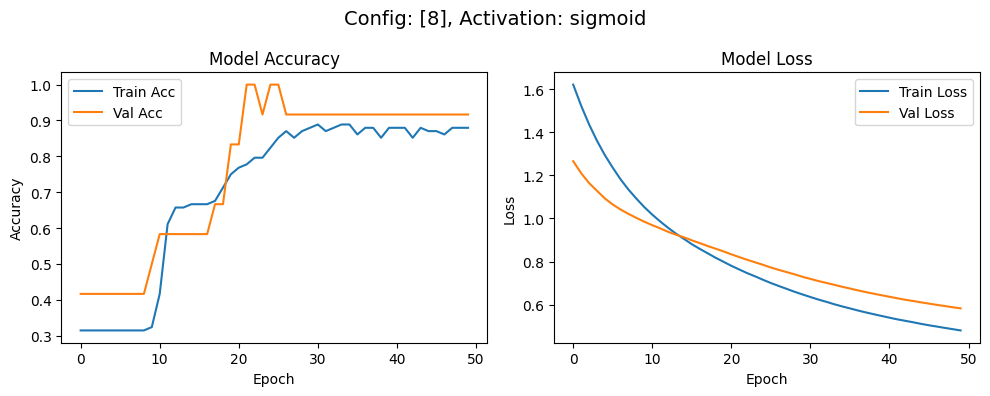


🔹 Testing MLP with hidden_layers=[16, 8], activation=relu
✅ Test Accuracy: 0.9667, Test Loss: 0.0976


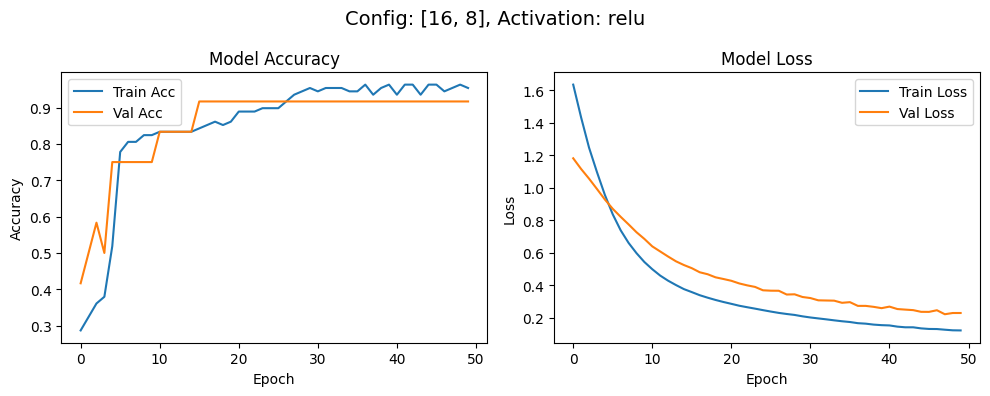


🔹 Testing MLP with hidden_layers=[16, 8], activation=tanh
✅ Test Accuracy: 0.9667, Test Loss: 0.0940


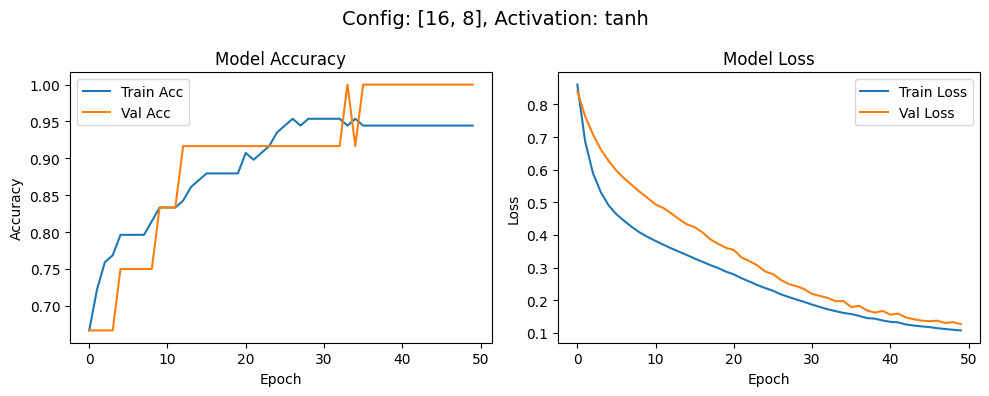


🔹 Testing MLP with hidden_layers=[16, 8], activation=sigmoid
✅ Test Accuracy: 0.9333, Test Loss: 0.5341


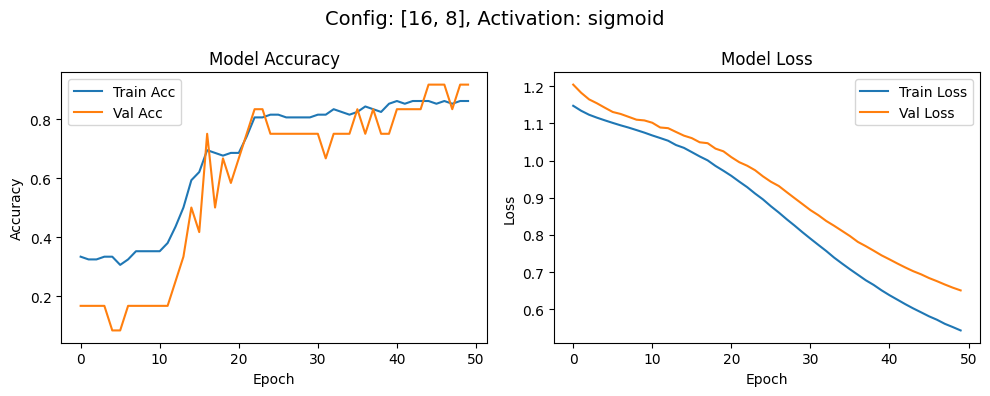


🔹 Testing MLP with hidden_layers=[32, 16, 8], activation=relu
✅ Test Accuracy: 1.0000, Test Loss: 0.0261


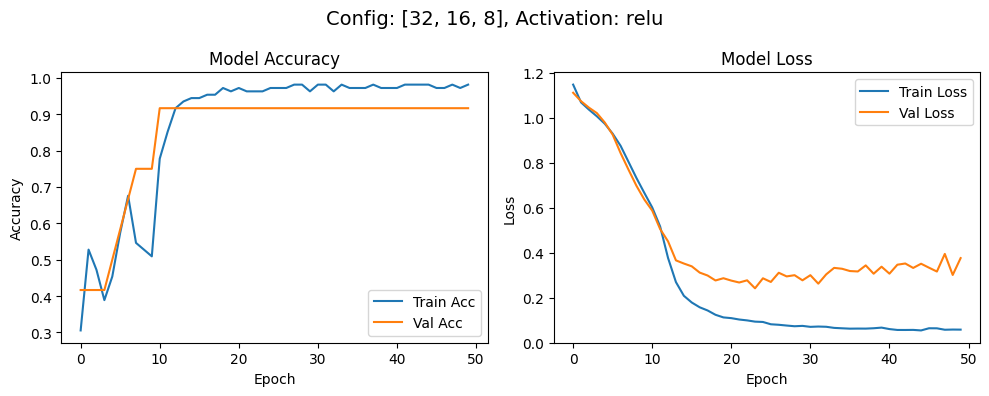


🔹 Testing MLP with hidden_layers=[32, 16, 8], activation=tanh
✅ Test Accuracy: 1.0000, Test Loss: 0.0456


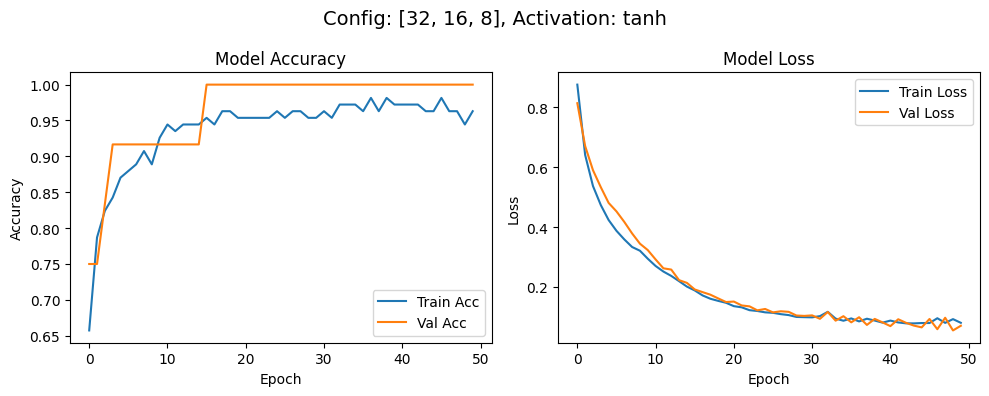


🔹 Testing MLP with hidden_layers=[32, 16, 8], activation=sigmoid
✅ Test Accuracy: 0.9333, Test Loss: 0.3198


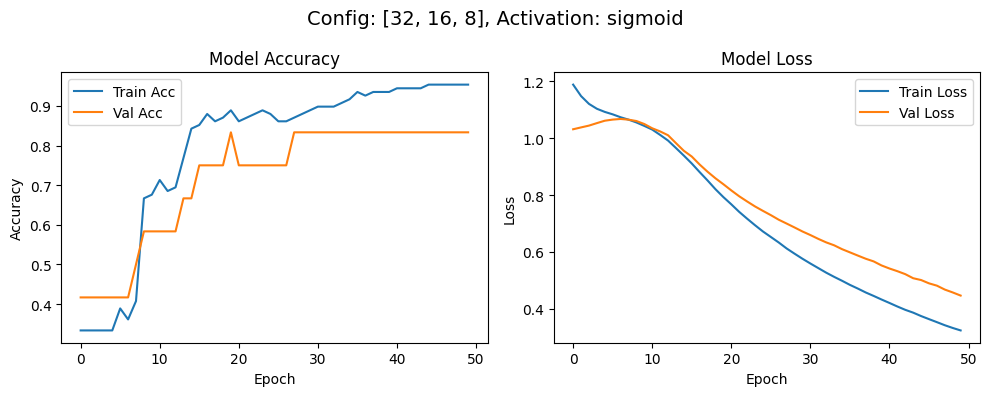


--- Iris Flower Prediction ---
Sepal length (cm): 8
Sepal width (cm): 4
Petal length (cm): 8
Petal width (cm): 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

🌸 Predicted Iris Species: virginica


In [ ]:
# Step 1: Import Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load and Preprocess Data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
classes = iris.target_names

# One-hot encoding (universal fix)
try:
    encoder = OneHotEncoder(sparse_output=False)  # for sklearn >= 1.2
    y_encoded = encoder.fit_transform(y)
except TypeError:
    encoder = OneHotEncoder()  # for older sklearn
    y_encoded = encoder.fit_transform(y).toarray()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Step 3: Define MLP Model Creation Function
def create_mlp(input_dim, output_dim, hidden_layers, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation=activation))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and Evaluate MLP with Various Configurations
hidden_layer_configs = [[8], [16, 8], [32, 16, 8]]
activations = ['relu', 'tanh', 'sigmoid']

for hidden_layers in hidden_layer_configs:
    for activation in activations:
        print(f"\n🔹 Testing MLP with hidden_layers={hidden_layers}, activation={activation}")

        model = create_mlp(
            input_dim=4, output_dim=3, hidden_layers=hidden_layers, activation=activation
        )

        history = model.fit(
            X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_split=0.1
        )

        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

        # Step 5: Plot Accuracy and Loss Curves
        plt.figure(figsize=(10, 4))
        plt.suptitle(f"Config: {hidden_layers}, Activation: {activation}", fontsize=14)

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')
        plt.legend()

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Model Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Step 6: Predict on New Input
print("\n--- Iris Flower Prediction ---")
try:
    # Use interactive input if running locally
    sepal_length = float(input("Sepal length (cm): "))
    sepal_width = float(input("Sepal width (cm): "))
    petal_length = float(input("Petal length (cm): "))
    petal_width = float(input("Petal width (cm): "))
    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
except:
    # Default test values for Colab
    print("⚠️ Using default input values (Colab does not support input prompts).")
    user_input = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: Iris-setosa

user_input_scaled = scaler.transform(user_input)

# Predict using the last trained model
prediction = model.predict(user_input_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class_name = classes[predicted_class_index]

print(f"\n🌸 Predicted Iris Species: {predicted_class_name}")